# Logistic Regression on Titanic Disaster


The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

With the help of this data set of details of people information who survived or not can summarize on which factors effected their survival.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic=pd.read_csv('train.csv')
titanic_test=pd.read_csv('test.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic=pd.read_csv('train.csv')

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

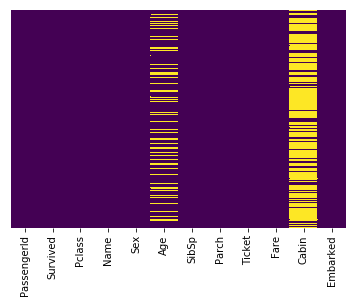

In [9]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
median_age=titanic['Age'].median()
titanic['Age'].fillna(median_age,inplace=True)

In [11]:
#The cabin column will not effect the output of the data 
#The people survived or not will not classified on the basis of the cabin so drop it
titanic.drop(['Cabin'],axis=1,inplace=True)
#better then the name of people Id of people will show better classification, so drop Name 
titanic.drop(['Name'],axis=1,inplace=True)
#ticket name also doesn't matter in the outcome variable 
titanic.drop(['Ticket'],axis=1,inplace=True)
#this will remove rest null values data 
titanic1=titanic.dropna()



In [12]:
# the fare which is not mentioned will be replaced by the median price  
median_fare=titanic1['Fare'].median()
titanic1['Fare'].fillna(median_fare,inplace=True) 

F:\anaconda\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [13]:
titanic1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [14]:
print(titanic1.Embarked.unique())

['S' 'C' 'Q']


In [15]:
#dummies value 
dummy1=pd.get_dummies(titanic1['Embarked']) #turns carbody column into a dummy variable 
dummy1.tail()


,C,Q,S
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0
890,0,1,0


In [16]:
titanic1=pd.concat([titanic,dummy1],axis=1)
titanic1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,0.0,0.0,1.0
1,2,1,1,female,38.0,1,0,71.2833,C,1.0,0.0,0.0
2,3,1,3,female,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,4,1,1,female,35.0,1,0,53.1000,S,0.0,0.0,1.0
4,5,0,3,male,35.0,0,0,8.0500,S,0.0,0.0,1.0


In [17]:
titanic1.drop(['Embarked'],axis=1,inplace=True)
titanic1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,male,22.0,1,0,7.2500,0.0,0.0,1.0
1,2,1,1,female,38.0,1,0,71.2833,1.0,0.0,0.0
2,3,1,3,female,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,female,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,male,35.0,0,0,8.0500,0.0,0.0,1.0


In [18]:
print(titanic1.Sex.unique())

['male' 'female']


In [19]:
titanic1.Sex[titanic1.Sex=='female']=0
titanic1.Sex[titanic1.Sex=='male']=1


F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
titanic1['Fare']=(titanic1['Fare'].round())

In [21]:

titanic1=titanic1.dropna()

In [22]:
titanic1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,1,22.0,1,0,7.0,0.0,0.0,1.0
1,2,1,1,0,38.0,1,0,71.0,1.0,0.0,0.0
2,3,1,3,0,26.0,0,0,8.0,0.0,0.0,1.0
3,4,1,1,0,35.0,1,0,53.0,0.0,0.0,1.0
4,5,0,3,1,35.0,0,0,8.0,0.0,0.0,1.0


F:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


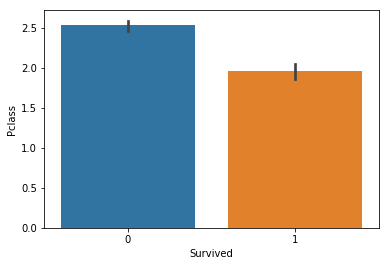

In [23]:
# plt.figure (figsize=(25,20))#analysing according to the Pclass
g = sns.barplot('Survived',"Pclass",data= titanic1);

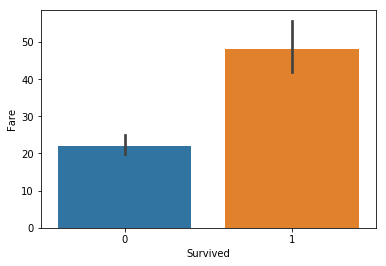

In [24]:
# plt.figure (figsize=(25,20)) #display the price of cars according Fare

sns.barplot(y='Fare',x='Survived',data=titanic1)


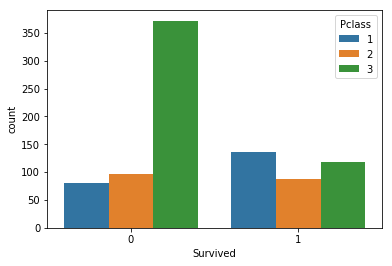

In [25]:
sns.countplot(x='Survived',data=titanic,hue='Pclass')


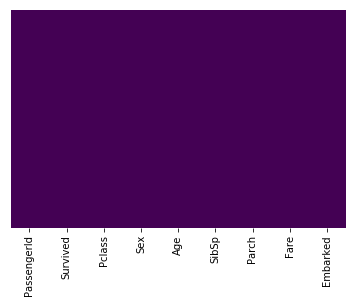

In [26]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [27]:
titanic1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,1,22.0,1,0,7.0,0.0,0.0,1.0
1,2,1,1,0,38.0,1,0,71.0,1.0,0.0,0.0
2,3,1,3,0,26.0,0,0,8.0,0.0,0.0,1.0
3,4,1,1,0,35.0,1,0,53.0,0.0,0.0,1.0
4,5,0,3,1,35.0,0,0,8.0,0.0,0.0,1.0


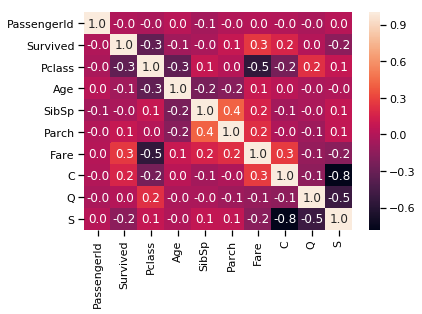

In [28]:
import seaborn as sns               
corr = titanic1.corr()      
#Corelation matrix:this will show the relationship between every variable of your matrix. 
# plt.figure (figsize=(50,50))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 3.5})

a = sns.heatmap(corr, annot=True, fmt='.1f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels())

In [29]:
titanic1=(titanic1-titanic1.mean())/(titanic1.max()-titanic1.min())   #normalisation formula
titanic1=titanic1.apply(pd.to_numeric, errors='coerce')
titanic1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,-0.500000,-0.382452,0.344207,0.350956,-0.091922,0.059477,-0.063742,-0.049037,-0.188976,-0.086614,0.275591
1,-0.498876,0.617548,-0.655793,-0.649044,0.109134,0.059477,-0.063742,0.075963,0.811024,-0.086614,-0.724409
2,-0.497753,0.617548,0.344207,-0.649044,-0.041658,-0.065523,-0.063742,-0.047084,-0.188976,-0.086614,0.275591
3,-0.496629,0.617548,-0.655793,-0.649044,0.071436,0.059477,-0.063742,0.040807,-0.188976,-0.086614,0.275591
4,-0.495506,-0.382452,0.344207,0.350956,0.071436,-0.065523,-0.063742,-0.047084,-0.188976,-0.086614,0.275591


In [30]:
titanic1['Survived']=titanic['Survived']
titanic1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,-0.500000,0,0.344207,0.350956,-0.091922,0.059477,-0.063742,-0.049037,-0.188976,-0.086614,0.275591
1,-0.498876,1,-0.655793,-0.649044,0.109134,0.059477,-0.063742,0.075963,0.811024,-0.086614,-0.724409
2,-0.497753,1,0.344207,-0.649044,-0.041658,-0.065523,-0.063742,-0.047084,-0.188976,-0.086614,0.275591
3,-0.496629,1,-0.655793,-0.649044,0.071436,0.059477,-0.063742,0.040807,-0.188976,-0.086614,0.275591
4,-0.495506,0,0.344207,0.350956,0.071436,-0.065523,-0.063742,-0.047084,-0.188976,-0.086614,0.275591


In [31]:
x=titanic1.iloc[:,titanic1.columns!='Survived']    #taking all the columns except price column(output)
y=titanic1['Survived']                           

In [32]:
from sklearn.model_selection import train_test_split   #train test split te data 
train_x,test_x,train_y, test_y = train_test_split(x,y, test_size=0.25)

In [33]:
import statsmodels.api as sm

In [34]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()

y_encode = lab_enc.fit_transform(y)
# print(y_encode)
print(utils.multiclass.type_of_target(y))
print(utils.multiclass.type_of_target(y.astype('int')))
print(utils.multiclass.type_of_target(y_encode))

binary
binary
binary


In [35]:
l1 = sm.GLM(train_y,(sm.add_constant(train_x)), family = sm.families.Binomial())
l1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  666
Model:                            GLM   Df Residuals:                      656
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -302.99
Date:                Tue, 21 Jan 2020   Deviance:                       605.98
Time:                        17:54:12   Pearson chi2:                     672.
No. Iterations:                     5   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5916      0.104     -5.702      0.000      -0.795      -0.388
PassengerId    -0.0171      0.349     -0.049      0.961      -0.700       0.666
Pclass         -2.0355      0.320     -6.359      0.000      -2.663      -1.408
Sex            -2.5921      0.226    -11.469      0.000      -3.035      -2.149
Age            -3.3251      0.700     -4.750      0.000      -4.697      -1.953
SibSp          -2.1253      0.988     -2.151      0.031      -4.062      -0.189
Parch          -0.9270      0.802     -1.156      0.248      -2.499       0.645
Fare            1.2856      1.382      0.930      0.352      -1.423       3.994
C               0.2550      0.204      1.252      0.210      -0.144       0.654
Q               0.0572      0.248      0.230      0.818      -0.430       0.544
S              -0.3122      0.158     -1.978      0.048      -0.622      -0.003
===============================================================================
"""

In [41]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [42]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()

y_encode = lab_enc.fit_transform(y)
# print(y_encode)
print(utils.multiclass.type_of_target(y))
print(utils.multiclass.type_of_target(y.astype('int')))
print(utils.multiclass.type_of_target(y_encode))

binary
binary
binary


In [43]:
# titanic.drop(titanic[name])

In [44]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 8)
rfe = rfe.fit(x,y_encode)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True  True  True  True False  True]
[3 1 1 1 1 1 1 1 2 1]


F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
features =x.columns[rfe.support_] 

In [46]:
#working on summary of rfe
X_train_rfe = train_x[features]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.GLM(train_y,X_train_rfe,family=sm.families.Binomial()).fit() 
print(lm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  666
Model:                            GLM   Df Residuals:                      657
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -302.99
Date:                Tue, 21 Jan 2020   Deviance:                       605.99
Time:                        17:54:15   Pearson chi2:                     672.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5917      0.104     -5.703      0.000      -0.795      -0.388
Pclass        -2.0355      0.320     -6.359      0.0

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [48]:
vif1 = pd.DataFrame()
vif1["vif"] = [variance_inflation_factor(X_train_rfe.values, a) for a in range(X_train_rfe.shape[1])]
vif1["features"] = X_train_rfe.columns # calculated vif on the rfe result features


In [49]:
vif1.round(1)

,vif,features
0,1.0,const
1,1.7,Pclass
2,1.1,Sex
3,1.2,Age
4,1.3,SibSp
5,1.3,Parch
6,1.6,Fare
7,2.9,C
8,2.7,S


In [50]:
#remove the factors which contain values of vif and p-value highest
model_01=titanic1[['Pclass','Survived','Sex','Age','SibSp','Parch','Fare','C','Q']]

In [51]:
a= model_01.loc[:,model_01.columns !='Survived'] #separting the dataset into two parts
b= model_01['Survived']    

In [52]:
from sklearn.model_selection import train_test_split 
train_a,test_a,train_b,test_b=train_test_split(a,b,test_size=0.25)
#split dataset into train test spilt 

In [53]:
# object for model
from sklearn.linear_model import LogisticRegression
model_01=LogisticRegression()

In [54]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()

b_encode = lab_enc.fit_transform(train_b)
# print(b_encode)
print(utils.multiclass.type_of_target(train_b))
print(utils.multiclass.type_of_target(train_b.astype('int')))
print(utils.multiclass.type_of_target(train_b))

binary
binary
binary


In [55]:
model_01.fit(train_a,b_encode) #model fit

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
print('intercept:' ,model_01.intercept_) #intercept of model

intercept: [-0.63410621]


In [57]:
train_a_sm = train_a
train_a_sm = sm.add_constant(train_a_sm) 
#ADDING CONSTANTS 
la = sm.GLM(b_encode,train_a_sm,family=sm.families.Binomial()).fit()

In [58]:
print(la.summary())    # model summary

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  666
Model:                            GLM   Df Residuals:                      657
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -302.28
Date:                Tue, 21 Jan 2020   Deviance:                       604.55
Time:                        17:54:16   Pearson chi2:                     667.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6641      0.103     -6.424      0.000      -0.867      -0.461
Pclass        -2.0975      0.326     -6.440      0.0

In [59]:
vif01 = pd.DataFrame()
vif01["vif"] = [variance_inflation_factor(train_a_sm.values, a) for a in range(train_a_sm.shape[1])]
vif01["features"] =train_a_sm.columns #calculated vif on the rfe result features

In [60]:
vif01

,vif,features
0,1.005736,const
1,1.719535,Pclass
2,1.139638,Sex
3,1.218704,Age
4,1.290068,SibSp
5,1.343740,Parch
6,1.611473,Fare
7,1.139970,C
8,1.099132,Q


In [61]:
#removing variables which have more p-vaue 
model_02=titanic1[['Pclass','Survived','Sex','Age','SibSp','Fare','C','Q']]


In [62]:
d= model_02.loc[:,model_02.columns !='Survived'] #separting the dataset into two parts
e= model_02['Survived']    

In [63]:
from sklearn.model_selection import train_test_split 
train_d,test_d,train_e,test_e=train_test_split(d,e,test_size=0.25)
#split dataset into train test spilt 

In [64]:
# object for model
from sklearn.linear_model import LogisticRegression
model_02=LogisticRegression()

In [65]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()

e_encode = lab_enc.fit_transform(train_e)
print(utils.multiclass.type_of_target(train_e))
print(utils.multiclass.type_of_target(train_e.astype('int')))
print(utils.multiclass.type_of_target(train_e))

binary
binary
binary


In [66]:
model_02.fit(train_a,e_encode) #model fit

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
print('intercept:' ,model_02.intercept_)

intercept: [-0.5429659]


In [68]:
train_d_sm = train_d
train_d_sm = sm.add_constant(train_d_sm) 
#ADDING CONSTANTS 
la1 = sm.GLM(e_encode,train_d_sm,family=sm.families.Binomial()).fit()

In [69]:
print(la1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  666
Model:                            GLM   Df Residuals:                      658
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -292.66
Date:                Tue, 21 Jan 2020   Deviance:                       585.33
Time:                        17:54:18   Pearson chi2:                     655.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6769      0.106     -6.382      0.000      -0.885      -0.469
Pclass        -2.0492      0.327     -6.260      0.0

In [70]:
vif02 = pd.DataFrame()
vif02["vif"] = [variance_inflation_factor(train_d_sm.values, a) for a in range(train_d_sm.shape[1])]
vif02["features"] =train_d_sm.columns # calculated vif on the rfe result features

In [71]:
vif02

,vif,features
0,1.007072,const
1,1.706276,Pclass
2,1.079249,Sex
3,1.244631,Age
4,1.145032,SibSp
5,1.539819,Fare
6,1.134619,C
7,1.085772,Q


In [72]:
model_03=titanic1[['Pclass','Sex','Age','SibSp','Survived','C','Q']]

In [73]:
i=model_03.loc[:,model_03.columns!='Survived']
j=model_03['Survived']

In [74]:
from sklearn.model_selection import train_test_split 
train_i,test_i,train_j,test_j=train_test_split(i,j,test_size=0.25)
#split dataset into train test spilt 

In [75]:
# object for model
from sklearn.linear_model import LogisticRegression
model_03=LogisticRegression()

In [76]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()

j_encode = lab_enc.fit_transform(train_j)
# print(j_encode)
print(utils.multiclass.type_of_target(train_j))
print(utils.multiclass.type_of_target(train_j.astype('int')))
print(utils.multiclass.type_of_target(train_j))

binary
binary
binary


In [77]:
model_03.fit(train_i,j_encode) #model fit

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
print('intercept:' ,model_03.intercept_)

intercept: [-0.67568779]


In [79]:
train_i_sm = train_i
train_i_sm = sm.add_constant(train_i_sm) 
#ADDING CONSTANTS 
la2 = sm.GLM(j_encode,train_i_sm,family=sm.families.Binomial()).fit()

In [80]:
print(la2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  666
Model:                            GLM   Df Residuals:                      659
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -278.04
Date:                Tue, 21 Jan 2020   Deviance:                       556.07
Time:                        17:54:20   Pearson chi2:                     687.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7262      0.110     -6.620      0.000      -0.941      -0.511
Pclass        -2.3665      0.293     -8.066      0.0

In [81]:
vif03 = pd.DataFrame()
vif03["vif"] = [variance_inflation_factor(train_i_sm.values, a) for a in range(train_i_sm.shape[1])]
vif03["features"] =train_i_sm.columns # calculated vif on the rfe result features

In [82]:
vif03

,vif,features
0,1.001725,const
1,1.235080,Pclass
2,1.059444,Sex
3,1.172223,Age
4,1.071724,SibSp
5,1.072422,C
6,1.070629,Q


In [83]:
model_04=titanic1[['Pclass','Survived','Sex','Age','SibSp','C']]


In [84]:
m=model_04.loc[:,model_04.columns!='Survived']
n=model_04['Survived']

In [85]:
from sklearn.model_selection import train_test_split 
train_m,test_m,train_n,test_n=train_test_split(m,n,test_size=0.25)
#split dataset into train test spilt 

In [86]:
# object for model
from sklearn.linear_model import LogisticRegression
model_04=LogisticRegression()

In [87]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()

n_encode = lab_enc.fit_transform(train_n)
# print(j_encode)
print(utils.multiclass.type_of_target(train_n))
print(utils.multiclass.type_of_target(train_n.astype('int')))
print(utils.multiclass.type_of_target(train_n))

binary
binary
binary


In [88]:
model_04.fit(train_m,n_encode) #model fit

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [89]:
print('intercept:' ,model_04.intercept_)

intercept: [-0.54943517]


In [90]:
train_m_sm = train_m
train_m_sm = sm.add_constant(train_m_sm) 
#ADDING CONSTANTS 
la3 = sm.GLM(n_encode,train_m_sm,family=sm.families.Binomial())
la3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  666
Model:                            GLM   Df Residuals:                      660
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -295.79
Date:                Tue, 21 Jan 2020   Deviance:                       591.58
Time:                        17:54:21   Pearson chi2:                     670.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5865      0.104     -5.624      0.000      -0.791      -0.382
Pclass        -2.0920      0.286     -7.313      0.000      -2.653      -1.531
Sex           -2.7036      0.226    -11.980      0.000      -3.146      -2.261
Age           -3.4448      0.728     -4.730      0.000      -4.872      -2.017
SibSp         -3.5292      0.981     -3.599      0.000      -5.451      -1.607
C              0.6154      0.268      2.296      0.022       0.090       1.141
==============================================================================
"""

In [91]:
r_pred =model_04.predict(test_m) #model prediction 

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(test_n, r_pred)   #getting the mean square error and r2 score 
r_sq = r2_score(test_n, r_pred)

In [93]:
r_sq

0.08876717092679576

In [94]:
mse

0.21076233183856502

In [95]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(test_n, r_pred)))  #root mean sq value

RMSE : 0.459088588225154


In [96]:
model_05=titanic1[['Pclass','Survived','Sex','Age','SibSp']]

In [97]:
w=model_05.loc[:,model_05.columns!='Survived']
z=model_05['Survived']


In [98]:
from sklearn.model_selection import train_test_split 
train_w,test_w,train_z,test_z=train_test_split(w,z,test_size=0.25)
#split dataset into train test spilt 

In [99]:
# object for model
from sklearn.linear_model import LogisticRegression
model_05=LogisticRegression()

In [100]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()

z_encode = lab_enc.fit_transform(train_z)
# print(j_encode)
print(utils.multiclass.type_of_target(train_z))
print(utils.multiclass.type_of_target(train_z.astype('int')))
print(utils.multiclass.type_of_target(train_z))

binary
binary
binary


In [101]:
test_z.head()

398    0
58     1
378    0
214    0
57     0
Name: Survived, dtype: int64

In [102]:
model_05.fit(train_w,z_encode) #model fit

F:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
print('intercept:' ,model_05.intercept_)

intercept: [-0.6881327]


In [104]:
train_w_sm = train_w
train_w_sm = sm.add_constant(train_w_sm) 
#ADDING CONSTANTS 
la4 = sm.GLM(z_encode,train_w_sm,family=sm.families.Binomial())
la4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  666
Model:                            GLM   Df Residuals:                      661
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -293.64
Date:                Tue, 21 Jan 2020   Deviance:                       587.28
Time:                        17:54:23   Pearson chi2:                     679.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7390      0.108     -6.867      0.000      -0.950      -0.528
Pclass        -2.6075      0.285     -9.148      0.000      -3.166      -2.049
Sex           -2.7314      0.227    -12.029      0.000      -3.176      -2.286
Age           -3.4538      0.707     -4.888      0.000      -4.839      -2.069
SibSp         -2.9192      0.925     -3.155      0.002      -4.733      -1.106
==============================================================================
"""

In [105]:
w_pred =model_05.predict(test_w) #model prediction 


In [106]:
Y_pred=model_05.predict_proba(test_w)

In [107]:
# Converting y_pred to a dataframe which is an array
y_test_df = pd.DataFrame(test_z)
y_test_df.head()
y_pred_df = pd.DataFrame(Y_pred)

In [108]:
# Converting to column dataframe
pred_1 = y_pred_df.iloc[:,[1]]

In [109]:
# Let's see the head
pred_1.head()

,1
0,0.278905
1,0.861794
2,0.120964
3,0.084549
4,0.098978


In [110]:
# Converting y_test to dataframe
test_df = pd.DataFrame(test_z)

In [111]:
# Putting CustID to index
test_df['CustID'] = test_df.index

In [112]:
# Removing index for both dataframes to append them side by side 
pred_1.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [113]:
# Appending y_test_df and y_pred_1
pred_df= pd.concat([test_df,pred_1],axis=1)

In [114]:
# Renaming the column 
pred_df= pred_df.rename(columns={ 1 : 'Survive_prob'})

In [115]:
pred_df =pred_df.reindex_axis(['CustID','Survived','Survive_prob'], axis=1)


F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


In [116]:
# Let's see the head of y_pred_final
pred_df.head()

,CustID,Survived,Survive_prob
0,398,0,0.278905
1,58,1,0.861794
2,378,0,0.120964
3,214,0,0.084549
4,57,0,0.098978


In [117]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
pred_df['predicted'] = pred_df.Survive_prob.map( lambda x: 1 if x > 0.5 else 0)

In [118]:
pred_df.head()

,CustID,Survived,Survive_prob,predicted
0,398,0,0.278905,0
1,58,1,0.861794,1
2,378,0,0.120964,0
3,214,0,0.084549,0
4,57,0,0.098978,0


In [119]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(test_z, w_pred)))  #root mean sq value

RMSE : 0.4287849137296606


In [120]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import log_loss
#calculating the confusion matrix 
results = confusion_matrix(pred_df.Survived,pred_df.predicted) 
print ('Confusion Matrix :')
print(results) 
#calculating the accuracy 
print ('Accuracy Score :',accuracy_score(pred_df.Survived,pred_df.predicted)) 
print( 'Report : ')
print (classification_report(pred_df.Survived,pred_df.predicted) )
print('Roc Auccuracy :',roc_auc_score(pred_df.Survived,pred_df.predicted))  
print('Log loss :',log_loss(pred_df.Survived,pred_df.predicted))

Confusion Matrix :
[[125  15]
 [ 26  57]]
Accuracy Score : 0.8161434977578476
Report : 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       140
           1       0.79      0.69      0.74        83

   micro avg       0.82      0.82      0.82       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.82      0.81       223

Roc Auccuracy : 0.7898020654044751
Log loss : 6.350232404272606


In [121]:
#calculating the senstivity fromconfusion matrix
sensitivity1 = results[0,0]/(results[0,0]+results[0,1])
print('Sensitivity : ', sensitivity1 )

#calculating the specificity from the confusion matrix
specificity1 = results[1,1]/(results[1,0]+results[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.8928571428571429
Specificity :  0.6867469879518072


In [122]:
TP =results[1,1] # true positive 
TN = results[0,0] # true negatives
FP = results[0,1] # false positives
FN = results[1,0] # false negatives

In [123]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10714285714285714


In [124]:
# positive predictive value 
print (TP / float(TP+FP))

0.7916666666666666


In [125]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8278145695364238


In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

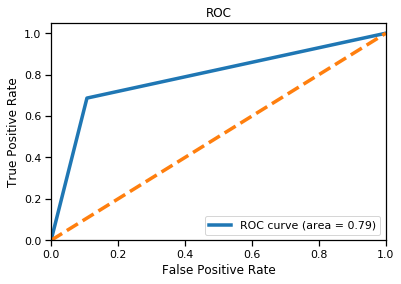

(array([0.        , 0.10714286, 1.        ]),
 array([0.        , 0.68674699, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [127]:
draw_roc(pred_df.Survived,pred_df.predicted)

In [128]:
#prob cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    pred_df[i]= pred_df.Survive_prob.map( lambda x: 1 if x > i else 0)
pred_df.head()

,CustID,Survived,Survive_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,398,0,0.278905,0,1,1,1,0,0,0,0,0,0,0
1,58,1,0.861794,1,1,1,1,1,1,1,1,1,1,0
2,378,0,0.120964,0,1,1,0,0,0,0,0,0,0,0
3,214,0,0.084549,0,1,0,0,0,0,0,0,0,0,0
4,57,0,0.098978,0,1,0,0,0,0,0,0,0,0,0


In [129]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( pred_df.Survived, pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.372197  1.000000  0.000000
0.1   0.1  0.493274  0.927711  0.235714
0.2   0.2  0.721973  0.783133  0.685714
0.3   0.3  0.775785  0.771084  0.778571
0.4   0.4  0.798206  0.710843  0.850000
0.5   0.5  0.816143  0.686747  0.892857
0.6   0.6  0.807175  0.530120  0.971429
0.7   0.7  0.789238  0.445783  0.992857
0.8   0.8  0.735426  0.301205  0.992857
0.9   0.9  0.681614  0.156627  0.992857


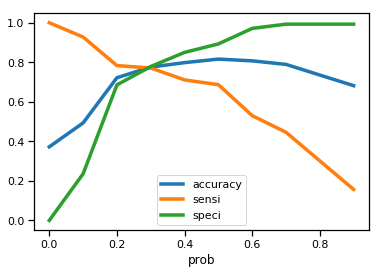

In [130]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])


In [136]:
pred_df['predicted'] = pred_df.Survive_prob.map( lambda x: 1 if x > 0.3 else 0)

In [137]:
pred_df.head()

,CustID,Survived,Survive_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,398,0,0.278905,0,1,1,1,0,0,0,0,0,0,0
1,58,1,0.861794,1,1,1,1,1,1,1,1,1,1,0
2,378,0,0.120964,0,1,1,0,0,0,0,0,0,0,0
3,214,0,0.084549,0,1,0,0,0,0,0,0,0,0,0
4,57,0,0.098978,0,1,0,0,0,0,0,0,0,0,0


In [138]:
results = confusion_matrix(pred_df.Survived,pred_df.predicted) 
print ('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[109  31]
 [ 19  64]]


In [139]:
#calculating the accuracy 
print ('Accuracy Score :',accuracy_score(pred_df.Survived,pred_df.predicted)) 
print( 'Report : ')
print (classification_report(pred_df.Survived,pred_df.predicted) )
print('Roc Auccuracy :',roc_auc_score(pred_df.Survived,pred_df.predicted))  
print('Log loss :',log_loss(pred_df.Survived,pred_df.predicted))

Accuracy Score : 0.7757847533632287
Report : 
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       140
           1       0.67      0.77      0.72        83

   micro avg       0.78      0.78      0.78       223
   macro avg       0.76      0.77      0.77       223
weighted avg       0.79      0.78      0.78       223

Roc Auccuracy : 0.7748278829604132
Log loss : 7.744231422716907


In [140]:
metrics.accuracy_score(pred_df.Survived, pred_df.predicted)


0.7757847533632287

In [141]:
#calculating the senstivity fromconfusion matrix
sensitivity1 = results[0,0]/(results[0,0]+results[0,1])
print('Sensitivity : ', sensitivity1 )

#calculating the specificity from the confusion matrix
specificity1 = results[1,1]/(results[1,0]+results[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.7785714285714286
Specificity :  0.7710843373493976


Text(0, 0.5, 'Probability_survival')

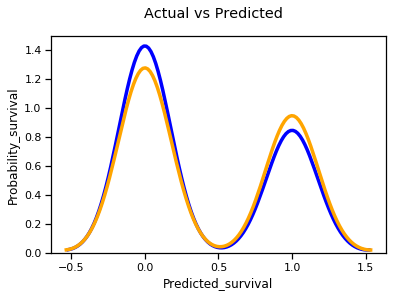

In [165]:
import seaborn as sns
sns.distplot(pred_df.Survived, hist=False,color='blue');
sns.distplot(pred_df.predicted,hist=False,color='orange');
plt.suptitle('Actual vs Predicted')              # Plot heading 
plt.xlabel('Predicted_survival')                               # X-label
plt.ylabel('Probability_survival')